In [2]:
# Importing the packages
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import random
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,RocCurveDisplay,ConfusionMatrixDisplay

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Importing the dataset
df = pd.read_csv('dataset_phishing.csv')
df.drop(['url'], axis=1, inplace=True)
#df.head(50)


In [5]:
# if your dataset contains missing value, check which column has missing values
#df.isnull().sum()

In [6]:
#df.dropna(inplace=True)

In [7]:
from sklearn import preprocessing


col = [df.columns[-1]]

lab_en= preprocessing.LabelEncoder()

for c in col:
    df[c]= lab_en.fit_transform(df[c])

#df.head(50)

In [8]:
a=len(df[df.status==0])
b=len(df[df.status==1])


In [9]:
print("Count of Legitimate Websites = ", a)
print("Count of Phishy Websites = ", b)

Count of Legitimate Websites =  5715
Count of Phishy Websites =  5715


In [10]:
X = df.drop(['status'], axis=1, inplace=False)
#X.head()
#same work
##inplace true modifies the og data & does not return anything
##inplace false does not modify og data but returns something whoch we store in a var
# X= df.drop(columns='Result')
# X.head()

In [11]:
#df.head()

In [12]:
y = df['status']
y = pd.DataFrame(y)
y.head()

,status
0,0
1,1
2,1
3,0
4,0


In [13]:
# separate dataset into train and test
from cProfile import label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 87), (2286, 87), (9144, 1), (2286, 1))

In [14]:
#X_test.head()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

col_X_train = [X_train.columns[:]]

for c in col_X_train:
    X_train[c]= scaler.fit_transform(X_train[c])

#X_train.head(5)

In [16]:
col_X_test = [X_test.columns[:]]

for c in col_X_test:
    X_test[c]= scaler.transform(X_test[c])

#X_test.head(5)

In [17]:
#perform chi square test
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train,y_train)

In [18]:
f_p_values

(array([2.23370641e+01, 1.69566642e+01, 7.92634978e+02, 2.14222888e+01,
        8.35897474e+00, 5.30407662e+01, 2.53295162e+02, 6.10286729e+01,
                   nan, 9.21347603e+01, 2.48852581e+00, 5.32938701e+00,
        1.36127244e+00, 2.76337058e+01, 6.97249509e+00, 3.02335502e+01,
        3.37730377e-02, 2.83381683e+01, 3.15422397e+00, 1.94038283e-02,
        5.01524054e+02, 4.11373688e+01, 4.68200813e+01, 2.09854284e+01,
        4.59133775e+01, 2.65045377e+02, 1.94693671e+02, 2.98821218e+00,
        1.97645536e+00, 5.07490559e+01, 3.59432236e+02, 1.31736523e+02,
        1.89723928e+01, 3.31523214e+02, 1.71903269e+00, 8.25729068e+01,
        7.75004553e-06, 8.27679909e-01, 2.98821218e+01, 1.99134491e+01,
        9.70793366e-02, 9.44986388e-01, 4.73779494e+01, 4.67727391e+00,
        2.67052777e+01, 6.69644804e+00, 4.14067508e+01, 8.24823685e+00,
        1.81658385e+01, 1.75476572e+01, 2.20716199e+02, 7.15055802e+01,
        4.28310413e+01, 3.52188528e+01, 1.13779295e+02, 1.735431

In [19]:
#The less the p_values the more important that feature is
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values

length_url                     2.287487e-06
length_hostname                3.824284e-05
ip                            2.154560e-174
nb_dots                        3.684629e-06
nb_hyphens                     3.837870e-03
nb_at                          3.266972e-13
nb_qm                          4.966874e-57
nb_and                         5.624958e-15
nb_or                                   NaN
nb_eq                          8.097056e-22
nb_underscore                  1.146791e-01
nb_tilde                       2.096876e-02
nb_percent                     2.433171e-01
nb_slash                       1.466018e-07
nb_star                        8.277200e-03
nb_colon                       3.830261e-08
nb_comma                       8.541904e-01
nb_semicolumn                  1.018675e-07
nb_dollar                      7.573069e-02
nb_space                       8.892150e-01
nb_www                        4.429634e-111
nb_com                         1.418973e-10
nb_dslash                      7

In [20]:
#sort p_values to check which feature has the lowest values
p_values = p_values.sort_values(ascending = False)
p_values

path_extension                 9.977788e-01
nb_space                       8.892150e-01
nb_comma                       8.541904e-01
right_clic                     7.869656e-01
char_repeat                    7.553631e-01
onmouseover                    7.344293e-01
nb_redirection                 3.629443e-01
shortest_words_raw             3.309988e-01
iframe                         2.454297e-01
nb_percent                     2.433171e-01
random_domain                  1.898176e-01
port                           1.597643e-01
nb_underscore                  1.146791e-01
login_form                     1.052268e-01
punycode                       8.387272e-02
nb_dollar                      7.573069e-02
ratio_extErrors                6.119567e-02
nb_extCSS                      3.486047e-02
shortest_word_path             3.056421e-02
nb_tilde                       2.096876e-02
longest_word_host              9.660518e-03
nb_star                        8.277200e-03
avg_words_raw                  4

In [21]:
def DropFeature (p_values, threshold):
	drop_feature = set()
	for index, values in p_values.items():
		if values > threshold or np.isnan(values):
			drop_feature.add(index)
	return drop_feature

In [22]:
drop_feature = DropFeature(p_values,.05)
len(set(drop_feature))


23

In [23]:
drop_feature

{'char_repeat',
 'iframe',
 'login_form',
 'nb_comma',
 'nb_dollar',
 'nb_or',
 'nb_percent',
 'nb_redirection',
 'nb_space',
 'nb_underscore',
 'onmouseover',
 'path_extension',
 'port',
 'punycode',
 'random_domain',
 'ratio_extErrors',
 'ratio_intErrors',
 'ratio_intRedirection',
 'ratio_nullHyperlinks',
 'right_clic',
 'sfh',
 'shortest_words_raw',
 'submit_email'}

In [24]:
X_train.drop(drop_feature, axis=1, inplace=True)
X_test.drop(drop_feature, axis=1, inplace=True)

In [25]:
len(X_train.columns)

64

In [26]:
len(X_test.columns)

64

In [27]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 9144 samples.
Testing set has 2286 samples.


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# defining parameter range
param_grid = {'penalty' : ['l2'],
            'C' : [0.1, 1, 10, 20, 30],
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [2500, 5000]}

grid_logr = GridSearchCV(LogisticRegression(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_logr.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_logr.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_logr.best_estimator_)
print(grid_logr.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
{'C': 30, 'max_iter': 2500, 'penalty': 'l2', 'solver': 'saga'}
LogisticRegression(C=30, max_iter=2500, solver='saga')
0.9425849266420346


In [29]:
logr_model = grid_logr.best_estimator_

# Performing training
#logr_model = logr.fit(X_train, y_train.values.ravel())

In [30]:
logr_predict  =  logr_model.predict(X_test)

In [31]:
# from sklearn.metrics import confusion_matrix,accuracy_score
# cm = confusion_matrix(y_test, dct_pred)
# ac = accuracy_score(y_test, dct_pred)

In [32]:
print ("Accuracy of logr classifier : ", accuracy_score(y_test, logr_predict)*100)

Accuracy of logr classifier :  94.35695538057742


In [33]:
print(classification_report(y_test, logr_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1152
           1       0.95      0.94      0.94      1134

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



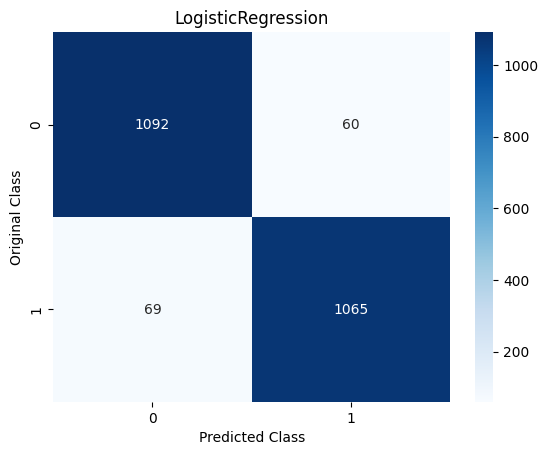

In [34]:
sns.heatmap(confusion_matrix(y_test, logr_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LogisticRegression")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [35]:
# from sklearn.neighbors import KNeighborsClassifier

# #training_accuracy=[]
# test_accuracy=[]

# neighbors=range(1,10)
# ##values.ravel() converts vector y to flattened array
# for i in neighbors:
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn_model = knn.fit(X_train,y_train.values.ravel())
#     #training_accuracy.append(knn.score(X_train,y_train.values.ravel()))
#     test_accuracy.append(knn_model.score(X_test,y_test.values.ravel()))

In [36]:
# plt.plot(neighbors,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("number of neighbors")
# plt.legend()
# plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# defining parameter range
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_knn.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)
0.9231213306070714


In [38]:
knn_model = grid_knn.best_estimator_
#knn_model = knn.fit(X_train,y_train.values.ravel())

In [39]:
#print ("Accuracy of knn classifier: ", max(test_accuracy)*100)
knn_predict = knn_model.predict(X_test)

In [40]:
print('The accuracy of knn Classifier is: ', 100.0 * accuracy_score(y_test, knn_predict))

The accuracy of knn Classifier is:  92.38845144356955


In [41]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1152
           1       0.94      0.91      0.92      1134

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



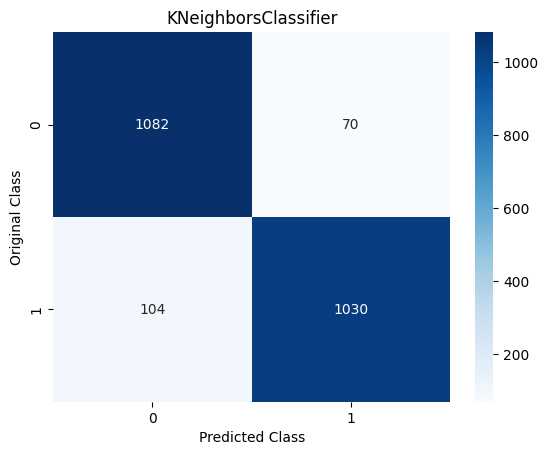

In [42]:
sns.heatmap(confusion_matrix(y_test, knn_predict), annot=True, fmt='g', cmap='Blues')
plt.title("KNeighborsClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [43]:
# # here is the change
# knn_y_pred_proba = knn.predict_proba(X_test)
# knn_y_pred_proba_positive = knn_y_pred_proba[:, 1] 

# RocCurveDisplay.from_predictions(y_test,knn_y_pred_proba_positive)

# fig, ax = plt.subplots()
# RocCurveDisplay.from_estimator(
#    logreg, X_test, y_test, ax = ax)

# logreg_y_decision = logreg.decision_function(X_test)
# metrics.RocCurveDisplay.from_predictions(y_test,logreg_y_decision,ax=ax,name="logreg predictions")

In [44]:
from sklearn.svm import SVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['linear','poly', 'rbf', 'sigmoid']}

grid_svc = GridSearchCV(SVC(), param_grid, refit = True, cv = 10, verbose = 3, n_jobs = -1)

# fitting the model for grid search
grid_svc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_svc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_svc.best_estimator_)
print(grid_svc.best_score_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
0.9572385837787423


In [45]:
svc_model = grid_svc.best_estimator_
#svc_model = svc.fit(X_train,y_train.values.ravel())

In [46]:
svc_predict = svc_model.predict(X_test)

In [47]:
print('The accuracy of svc Classifier is: ', 100.0 * accuracy_score(y_test, svc_predict))

The accuracy of svc Classifier is:  95.71303587051618


In [48]:
print(classification_report(y_test, svc_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1152
           1       0.97      0.95      0.96      1134

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



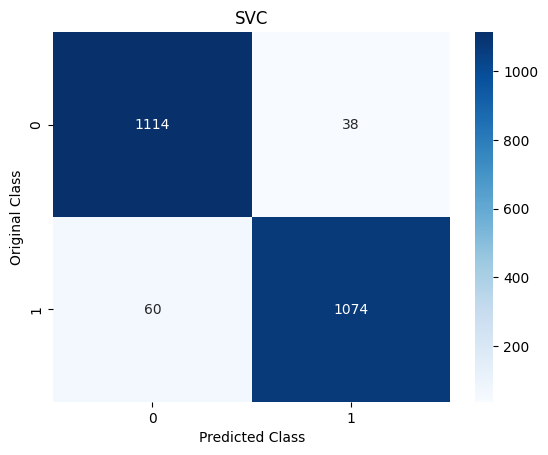

In [49]:
sns.heatmap(confusion_matrix(y_test, svc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("SVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [50]:
from sklearn.svm import NuSVC

# defining parameter range
param_grid = {'nu': [0.1, 0.5],
			'gamma': [1, 0.1, 0.01],
			'kernel': ['rbf']} #'linear','poly', 'rbf', 'sigmoid'

grid_nusvc = GridSearchCV(NuSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_nusvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_nusvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_nusvc.best_estimator_)
print(grid_nusvc.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.1}
NuSVC(gamma=0.1, nu=0.1)
0.9580039698198037


In [51]:
nusvc_model = grid_nusvc.best_estimator_
#nusvc_model = nusvc.fit(X_train, y_train.values.ravel())


In [52]:
nusvc_predict = nusvc_model.predict(X_test)

In [53]:
print('The accuracy of nusvc Classifier is: ', 100.0 * accuracy_score(y_test, nusvc_predict))

The accuracy of nusvc Classifier is:  95.71303587051618


In [54]:
print(classification_report(y_test, nusvc_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1152
           1       0.96      0.95      0.96      1134

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



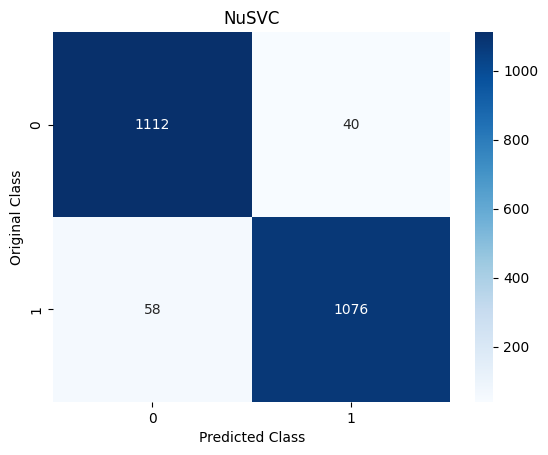

In [55]:
sns.heatmap(confusion_matrix(y_test, nusvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("NuSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [56]:
from sklearn.svm import LinearSVC

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 20, 30],
			'penalty': ['l1','l2'],
			'loss': ['squared_hinge'],
			'dual': [False],
			'tol': [.1,.01,.001]}

grid_lsvc = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_lsvc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_lsvc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_lsvc.best_estimator_)
print(grid_lsvc.best_score_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'C': 20, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.001}
LinearSVC(C=20, dual=False, tol=0.001)
0.9426942162595209


In [57]:
lsvc_model = grid_lsvc.best_estimator_
#lsvc_model = lsvc.fit(X_train, y_train.values.ravel())

In [58]:
lsvc_predict = lsvc_model.predict(X_test)

In [59]:
print('The accuracy of lsvc Classifier is: ', 100.0 * accuracy_score(y_test, lsvc_predict))

The accuracy of lsvc Classifier is:  94.53193350831145


In [60]:
print(classification_report(y_test, lsvc_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1152
           1       0.95      0.94      0.94      1134

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



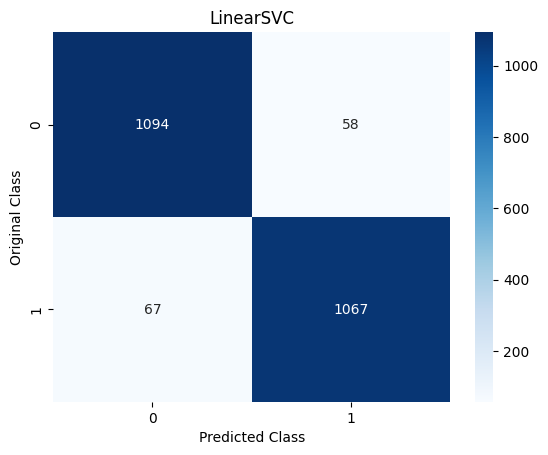

In [61]:
sns.heatmap(confusion_matrix(y_test, lsvc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("LinearSVC")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [62]:
from sklearn.ensemble import AdaBoostClassifier

# defining parameter range
param_grid = {'n_estimators': [40,50,100,200,300]}

grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_ada.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_ada.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 300}
AdaBoostClassifier(n_estimators=300)
0.9539591778168383


In [63]:
ada_model = grid_ada.best_estimator_
#ada_model = ada.fit(X_train,y_train.values.ravel())

In [64]:
ada_predict = ada_model.predict(X_test)

In [65]:
print('The accuracy of Ada Boost Classifier is: ', 100.0 * accuracy_score(ada_predict,y_test))

The accuracy of Ada Boost Classifier is:  95.2755905511811


In [66]:
print(classification_report(y_test, ada_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1152
           1       0.96      0.95      0.95      1134

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



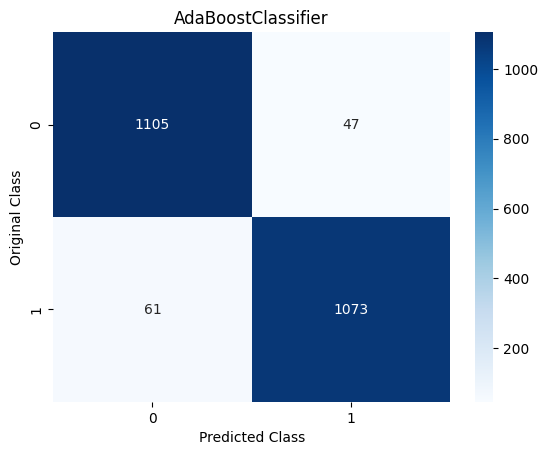

In [67]:
sns.heatmap(confusion_matrix(y_test, ada_predict), annot=True, fmt='g', cmap='Blues')
plt.title("AdaBoostClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [68]:
from xgboost import XGBClassifier


# defining parameter range
param_grid = {
    "gamma": [.01, .1, .5],
    "n_estimators": [50,100,150,200,250]
}

grid_xgb = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_xgb.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_xgb.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_xgb.best_estimator_)
print(grid_xgb.best_score_)


Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'gamma': 0.1, 'n_estimators': 150}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=150,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
0.9704711171694707


In [69]:
xgb_model = grid_xgb.best_estimator_
#xgb_model = xgb.fit(X_train,y_train)

In [70]:
xgb_predict=xgb_model.predict(X_test)

In [71]:
print('The accuracy of XGBoost Classifier is: ' , 100.0 * accuracy_score(xgb_predict,y_test))

The accuracy of XGBoost Classifier is:  96.93788276465442


In [72]:
print(classification_report(y_test, xgb_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1152
           1       0.97      0.96      0.97      1134

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



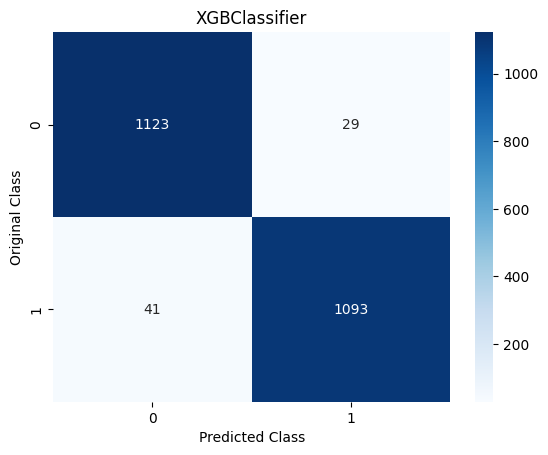

In [73]:
sns.heatmap(confusion_matrix(y_test, xgb_predict), annot=True, fmt='g', cmap='Blues')
plt.title("XGBClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

# defining parameter range
param_grid = {
    "learning_rate": [.1,.5,1],
    "n_estimators": [50,100,150,200,250]
}

grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_gbc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_gbc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_gbc.best_estimator_)
print(grid_gbc.best_score_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
{'learning_rate': 0.5, 'n_estimators': 250}
GradientBoostingClassifier(learning_rate=0.5, n_estimators=250)
0.9658795183604166


In [75]:
gbc_model = grid_gbc.best_estimator_
#gbc_model = gbc.fit(X_train,y_train.values.ravel())

#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
#    max_depth=1, random_state=0).fit(X_train, y_train)
#clf.score(X_test, y_test)

In [76]:
gbc_predict = gbc_model.predict(X_test)

In [77]:
print('The accuracy of GradientBoost Classifier is: ' , 100.0 * accuracy_score(gbc_predict,y_test))

The accuracy of GradientBoost Classifier is:  96.63167104111986


In [78]:
print(classification_report(y_test, gbc_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1152
           1       0.97      0.96      0.97      1134

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



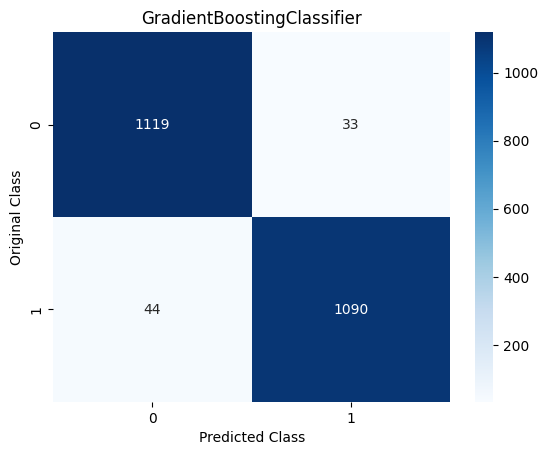

In [79]:
sns.heatmap(confusion_matrix(y_test, gbc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("GradientBoostingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [80]:
# gbc_model.get_params().keys()

In [81]:
# import inspect
# import sklearn
# import xgboost

# models = [xgboost.XGBClassifier]
# for m in models:
#     hyperparams = inspect.signature(m.__init__)
#     print(hyperparams)
# #or
# xgb_model.get_params().keys()


In [82]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# defining parameter range
param_grid = {
    "base_estimator": [DecisionTreeClassifier()],
    "n_estimators": [50,100,150,200,250]
}

grid_bag = GridSearchCV(BaggingClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_bag.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_bag.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_bag.best_estimator_)
print(grid_bag.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 250}
BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250)
0.9575681266516005


In [83]:
bag_model = grid_bag.best_estimator_
#bag_model = bag.fit(X_train, y_train.values.ravel())


In [84]:
bag_predict = bag_model.predict(X_test)

In [85]:
print('The accuracy of Bagging Classifier is: ' , 100.0 * accuracy_score(y_test, bag_predict))

The accuracy of Bagging Classifier is:  95.84426946631672


In [86]:
print(classification_report(y_test, bag_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1152
           1       0.96      0.95      0.96      1134

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



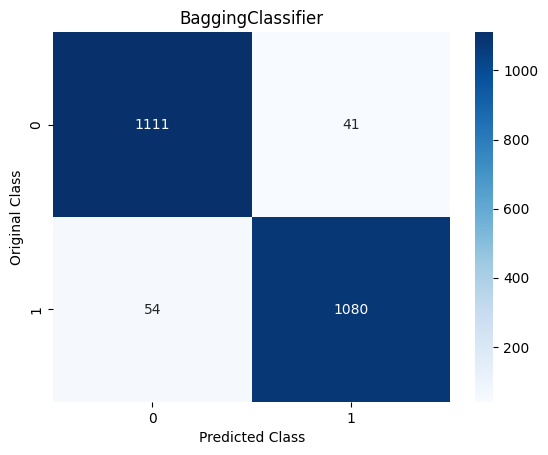

In [87]:
sns.heatmap(confusion_matrix(y_test, bag_predict), annot=True, fmt='g', cmap='Blues')
plt.title("BaggingClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier

# defining parameter range
param_grid = {
    "n_estimators": [50,100,150,200,250]
}

grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv = 10, n_jobs = -1)

# fitting the model for grid search
grid_rfc.fit(X_train, y_train.values.ravel())

# print best parameter after tuning
print(grid_rfc.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_rfc.best_estimator_)
print(grid_rfc.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
{'n_estimators': 100}
RandomForestClassifier()
0.9666444261099352


In [89]:
rfc_model = grid_rfc.best_estimator_
#rfc_model = rfc.fit(X_train,y_train.values.ravel())

In [90]:
rfc_predict = rfc_model.predict(X_test)

In [91]:
print('The accuracy of RandomForest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,y_test))

The accuracy of RandomForest Classifier is:  96.23797025371829


In [92]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1152
           1       0.97      0.96      0.96      1134

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



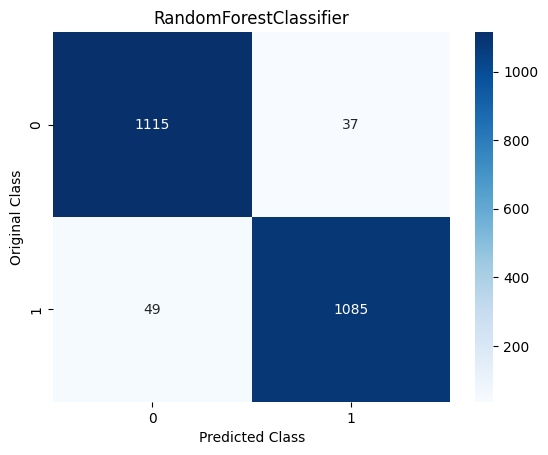

In [93]:
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot=True, fmt='g', cmap='Blues')
plt.title("RandomForestClassifier")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

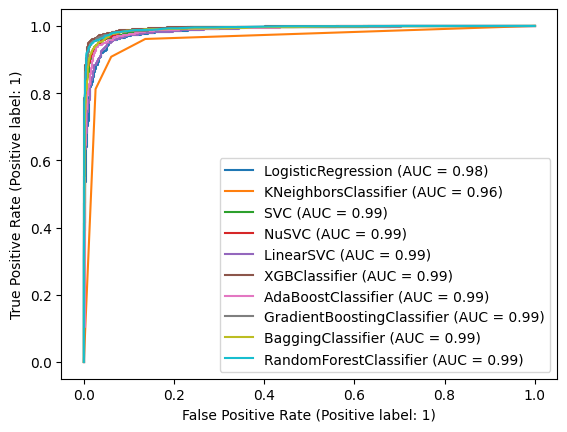

In [94]:
estimators = [logr_model,knn_model,svc_model,nusvc_model,lsvc_model,xgb_model,ada_model,gbc_model,bag_model,rfc_model]

for estimator in estimators:
    RocCurveDisplay.from_estimator(estimator,X_test,y_test,ax=plt.gca())


In [95]:
import tensorflow as tf
#from tensorflow.keras.datasets import imdb
from keras.layers import Embedding, Dense, LSTM, BatchNormalization
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
#from tensorflow.keras.preprocessing.sequence import pad_sequences

# Model configuration
additional_metrics = ['accuracy']
batch_size = 32
#embedding_output_dims = (X_train.shape[1])
loss_function = BinaryCrossentropy()
#max_sequence_length = (X_train.shape[1])
#num_distinct_words = (X_train.shape[1])
number_of_epochs = 100
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# reshape from [samples, features] into [samples, timesteps, features]
timesteps = 1
X_train_reshape = X_train.values.ravel().reshape(X_train.shape[0],timesteps, X_train.shape[1])
X_test_reshape = X_test.values.ravel().reshape(X_test.shape[0],timesteps, X_test.shape[1])

# Disable eager execution
#tf.compat.v1.disable_eager_execution()

# Load dataset
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_distinct_words)
# print(x_train.shape)
# print(x_test.shape)

# Pad all sequences
# padded_inputs = pad_sequences(X_train, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>
# padded_inputs_test = pad_sequences(X_test, maxlen=max_sequence_length, value = 0.0) # 0.0 because it corresponds with <PAD>

# Define the Keras model
def build_model_lstm():
    model = Sequential()
    #model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
    model.add(LSTM(100, input_shape = (timesteps,X_train_reshape.shape[2])))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)
    return model

#from keras.wrappers.scikit_learn import KerasClassifier
lstm_model = build_model_lstm()
# Give a summary
lstm_model.summary()

# Train the model
history = lstm_model.fit(X_train_reshape, y_train.values.ravel(), batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

# Test the model after training
#lstm_predict = lstm_model.predict(X_test_reshape)
test_results = lstm_model.evaluate(X_test_reshape, y_test.values.ravel(), verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                        

In [96]:
lstm_predict_proba = lstm_model.predict(X_test_reshape, batch_size=32)
lstm_predict_class = (lstm_predict_proba > 0.5).astype("int32")
print(classification_report(y_test, lstm_predict_class))

72/72 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1152
           1       0.95      0.96      0.95      1134

    accuracy                           0.95      2286
   macro avg       0.95      0.95      0.95      2286
weighted avg       0.95      0.95      0.95      2286



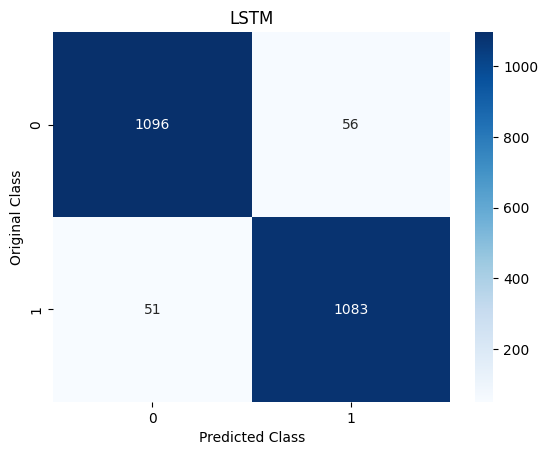

In [97]:
sns.heatmap(confusion_matrix(y_test, lstm_predict_class), annot=True, fmt='g', cmap='Blues')
plt.title("LSTM")
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


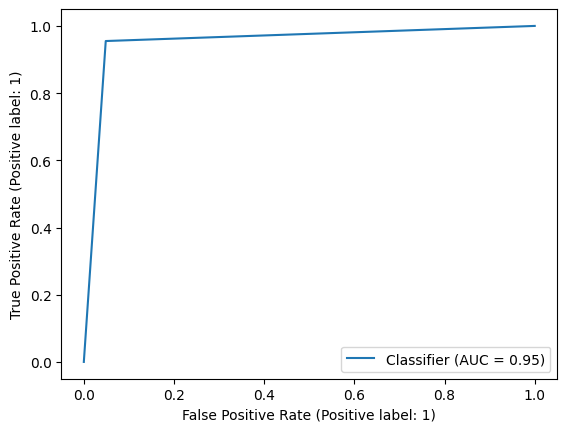

In [98]:
RocCurveDisplay.from_predictions(y_test,lstm_predict_class)
plt.show()